In [51]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import warnings
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
data.shape

(200, 4)

In [6]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:>

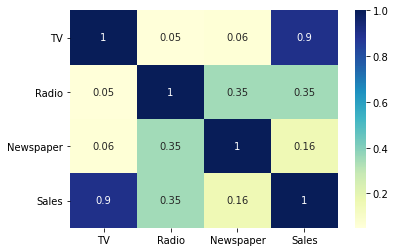

In [8]:
# correlation and heatmap

correlation_matrix = data.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,cmap = "YlGnBu" )

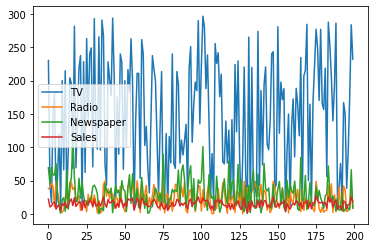

In [9]:
plt.plot(data)
plt.legend(['TV', 'Radio', 'Newspaper', 'Sales']);

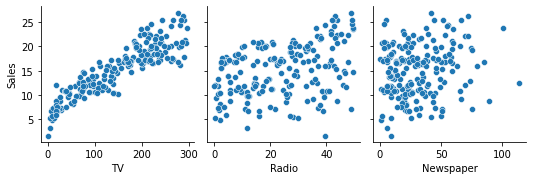

In [53]:
sns.pairplot(data,x_vars = ["TV","Radio","Newspaper"],y_vars = "Sales")

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'Radio'}>],
       [<AxesSubplot:title={'center':'Newspaper'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

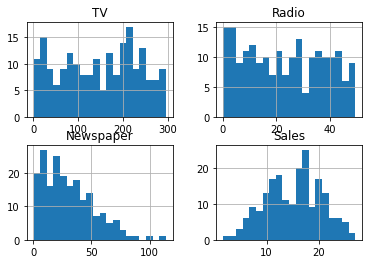

In [57]:
data.hist(bins = 20)

<AxesSubplot:title={'center':'Sales'}, xlabel='TV', ylabel='Radio'>

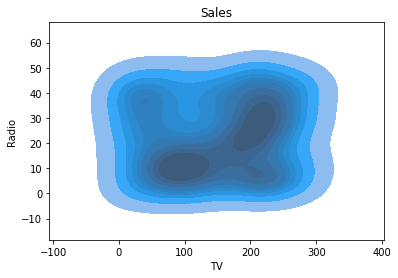

In [23]:
plt.title("Sales")

sns.kdeplot(data['TV'], data['Radio'], shade=True, shade_lowest=False)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

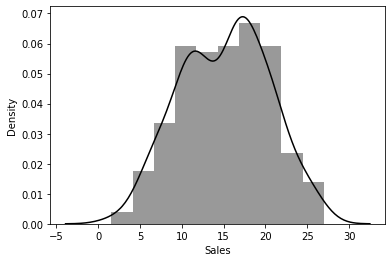

In [59]:
sns.distplot(data.Sales,bins = 10, color = "black",hist = True)

In [41]:
X = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [42]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [91]:
lm = LinearRegression()

In [100]:
lm.fit(X_train,y_train)

LinearRegression()

In [101]:
train_predict = lm.predict(X_train)

In [102]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.055079
Radio,0.103086
Newspaper,-0.000901


In [103]:
print('MAE:', metrics.mean_absolute_error(y_train, train_predict))
print('MSE:', metrics.mean_squared_error(y_train, train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_predict)))
print('R2 Score:', metrics.r2_score(y_train, train_predict))

MAE: 1.238995839228217
MSE: 2.790374218824517
RMSE: 1.6704413245680068
R2 Score: 0.905486333977187


In [95]:
predictions = lm.predict(X_test)

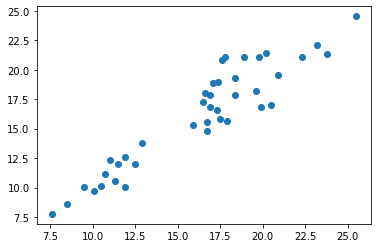

In [96]:
plt.scatter(y_test,predictions)

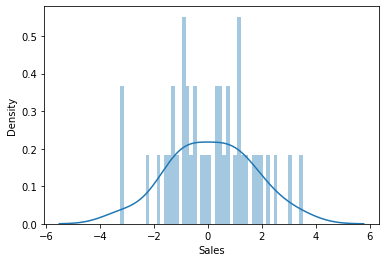

In [98]:
sns.distplot((y_test-predictions),bins=50);

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score:', metrics.r2_score(y_test, predictions))

MAE: 1.275439091293968
MSE: 2.409333612892368
RMSE: 1.5522028259516758
R2 Score: 0.8747226291661847


In [109]:
accuracy = lm.score(X,y)
print(accuracy)

0.90229755441831
